# Limpio

In [1]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras 
from keras import layers
from keras.datasets import fashion_mnist
from sklearn.metrics import classification_report

In [36]:
import matplotlib.pyplot as plt

def plot(axis, train, validation, title):
    # We create a list of epoch numbers from 1 to the length of the training set
    epochs = range(1, len(train) + 1)
    # Graph of the training data with a solid blue line
    axis.plot(epochs, train, 'b-o', label='Training ' + title)
    # Graph of the validation data with a red dashed line
    axis.plot(epochs, validation, 'r--o', label='Validation '+ title)
    # We set the title of the graph, the X and Y axis labels
    axis.set_title('Training and validation ' + title)
    axis.set_xlabel('Epochs')
    axis.set_ylabel(title)
    # We show the legend of the graph
    axis.legend()    

def multiplot(history):
    fig, axes = plt.subplots(1, 2)
    fig.set_figwidth(11)
    plot(axes[0], history.history['loss'], history.history['val_loss'], 'loss')
    plot(axes[1], history.history['accuracy'], history.history['val_accuracy'], 'accuracy')

    # We show the graphs on screen
    plt.show()

## Data preprocessing

In [20]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
'Train data'
# Reshape the images to vectors of size 784 (28*28)
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)

'Validation data separation'
val_images = train_images[:10000]
val_labels = train_labels[:10000]
train_images = train_images[10000:]
train_labels = train_labels[10000:]

print("Data ready. Training set size:", train_images.shape)

Data ready. Training set size: (50000, 784)


## Neural Network setup

In [4]:
def build_model(n_layers = 2, 
                n_per_layer = 50, 
                layer_act_func = 'sigmoid', 
                output_act_func = 'softmax',
                learning_rate = 0.001,
                loss_function = "categorical_crossentropy",
                metrics = ["accuracy"],
                epochs = 25,
                batch_size = 512):
    
    '''Builds and trains a feedforward neural network on the Fashion MNIST dataset.'''
    # Neural network setup
    _model = keras.Sequential(name='model')
    _model.add(layers.Input(shape=(28*28, )))
    for _lay in range(n_layers):
        _model.add(layers.Dense(n_per_layer, activation = layer_act_func)) 
    _model.add(layers.Dense(10, name = 'output', activation = output_act_func))
    _model.summary()
    # Training setup
    _opt = keras.optimizers.Adam(learning_rate = learning_rate)
    _model.compile(optimizer = _opt, loss = loss_function, metrics = metrics)
    _history = _model.fit(train_images,
                          train_labels,
                          epochs = epochs,
                          batch_size = batch_size,
                          validation_data = (val_images, val_labels))
    return _model, _history

## Reports and evaluation

In [5]:
def print_report(model):
    '''Generates and prints a classification report for the given model on the test dataset.'''
    # Predict the classes for the test set
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)
    # Generate the classification report
    report = classification_report(test_labels, predicted_classes, target_names = ['T-shirt/top', 
                                                                                    'Trouser', 
                                                                                    'Pullover', 
                                                                                    'Dress', 
                                                                                    'Coat', 
                                                                                    'Sandal', 
                                                                                    'Shirt', 
                                                                                    'Sneaker', 
                                                                                    'Bag', 
                                                                                    'Ankle boot'])
    # Print the evaluation metrics
    print ("Classification Report:")
    print (report)

## Testing different models

In [ ]:
'Base model with relu activation'
relu_model, relu_history = build_model(
                                        n_layers = 2, 
                                        n_per_layer = 50, 
                                        layer_act_func = 'relu', 
                                        output_act_func = 'softmax',
                                        learning_rate = 0.001,
                                        loss_function = "categorical_crossentropy",
                                        metrics = ["accuracy"],
                                        epochs = 30,
                                        batch_size = 400
                                    )

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


ValueError: Could not interpret loss identifier: sparse_categorical_accuracy

In [13]:
'Model with less epochs'
less_epochs_model, less_epochs_history = build_model(
                                        n_layers = 2,
                                        n_per_layer = 50,
                                        layer_act_func = 'relu',
                                        output_act_func = 'softmax',
                                        learning_rate = 0.001,
                                        loss_function = "categorical_crossentropy",
                                        metrics = ["accuracy"],
                                        epochs = 20,
                                        batch_size = 400
                                    )

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7220 - loss: 0.8346 - val_accuracy: 0.8217 - val_loss: 0.5243
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8313 - loss: 0.4844 - val_accuracy: 0.8416 - val_loss: 0.4566
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8481 - loss: 0.4330 - val_accuracy: 0.8469 - val_loss: 0.4357
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8576 - loss: 0.4066 - val_accuracy: 0.8527 - val_loss: 0.4162
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8653 - loss: 0.3877 - val_accuracy: 0.8559 - val_loss: 0.4039
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8705 - loss: 0.3714 - val_accuracy: 0.8642 - val_loss: 0.3871
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8731 - loss: 0.3606 - val_accuracy: 0.8659 - val_loss: 0.3820
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8718 - loss: 0.3603 - val_accuracy: 0.

In [14]:
'Model with more layers'
more_layers_model, more_layers_history = build_model(
                                        n_layers = 4,
                                        n_per_layer = 50,
                                        layer_act_func = 'relu',
                                        output_act_func = 'softmax',
                                        learning_rate = 0.001,
                                        loss_function = "categorical_crossentropy",
                                        metrics = ["accuracy"],
                                        epochs = 20,
                                        batch_size = 400
                                    )

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,410 (185.20 KB)

 Trainable params: 47,410 (185.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7037 - loss: 0.8599 - val_accuracy: 0.8093 - val_loss: 0.5428
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8311 - loss: 0.4846 - val_accuracy: 0.8392 - val_loss: 0.4517
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8489 - loss: 0.4271 - val_accuracy: 0.8531 - val_loss: 0.4141
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8580 - loss: 0.3977 - val_accuracy: 0.8568 - val_loss: 0.4019
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8600 - loss: 0.3868 - val_accuracy: 0.8554 - val_loss: 0.4041
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8690 - loss: 0.3625 - val_accuracy: 0.8666 - val_loss: 0.3718
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8758 - loss: 0.3477 - val_accuracy: 0.8683 - val_loss: 0.3666
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8761 - loss: 0.3412 - val_accuracy: 0.

In [17]:
'Model with 4 layers and 100 neurons per layer'
more_neurons_model, more_neurons_history = build_model(
                                        n_layers = 4,
                                        n_per_layer = 100,
                                        layer_act_func = 'relu',
                                        output_act_func = 'softmax',
                                        learning_rate = 0.001,
                                        loss_function = "categorical_crossentropy",
                                        metrics = ["accuracy"],
                                        epochs = 15,
                                        batch_size = 350
                                    )

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,810 (428.95 KB)

 Trainable params: 109,810 (428.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7519 - loss: 0.7082 - val_accuracy: 0.8428 - val_loss: 0.4491
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8447 - loss: 0.4332 - val_accuracy: 0.8420 - val_loss: 0.4370
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8606 - loss: 0.3882 - val_accuracy: 0.8563 - val_loss: 0.3924
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8731 - loss: 0.3521 - val_accuracy: 0.8688 - val_loss: 0.3631
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8774 - loss: 0.3380 - val_accuracy: 0.8737 - val_loss: 0.3408
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8845 - loss: 0.3170 - val_accuracy: 0.8784 - val_loss: 0.3268
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8879 - loss: 0.3047 - val_accuracy: 0.8766 - val_loss: 0.3284
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8913 - loss: 0.2927 - val_accuracy: 0.

### Reports

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.79      0.81      1000
     Trouser       1.00      0.94      0.97      1000
    Pullover       0.74      0.88      0.80      1000
       Dress       0.89      0.86      0.88      1000
        Coat       0.84      0.74      0.78      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.67      0.71      0.69      1000
     Sneaker       0.94      0.94      0.94      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



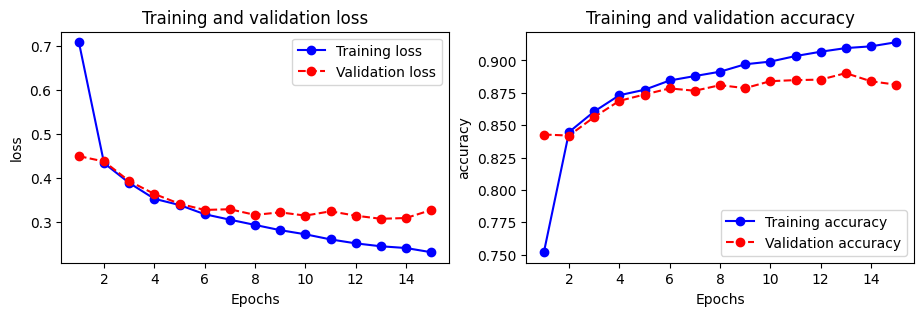

In [18]:
'2 layers'
# print_report(relu_model)
# print_report(less_epochs_model)

'4 layers'
# print_report(more_layers_model)
print_report(more_neurons_model)
multiplot(more_neurons_history)

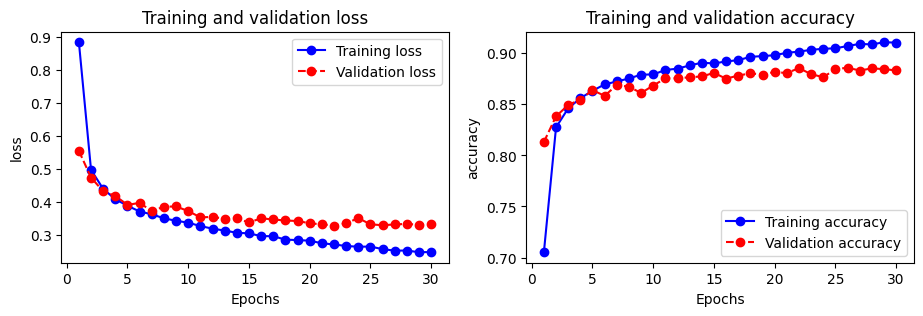

In [11]:
multiplot(relu_history)

# Regularization

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7332 - loss: 0.7548 - val_accuracy: 0.8329 - val_loss: 0.4598
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8297 - loss: 0.4787 - val_accuracy: 0.8476 - val_loss: 0.4045
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8418 - loss: 0.4371 - val_accuracy: 0.8619 - val_loss: 0.3767
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8531 - loss: 0.4045 - val_accuracy: 0.8670 - val_loss: 0.3672
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8611 - loss: 0.3870 - val_accuracy: 0.8754 - val_loss: 0.3467
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8660 - loss: 0.3692 - val_accuracy: 0.8751 - val_loss: 0.3430
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8695 - loss: 0.3604 - val_accuracy: 0.8755 - val_loss: 0.3320
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8723 - loss: 0.3510 - val_accuracy: 0.

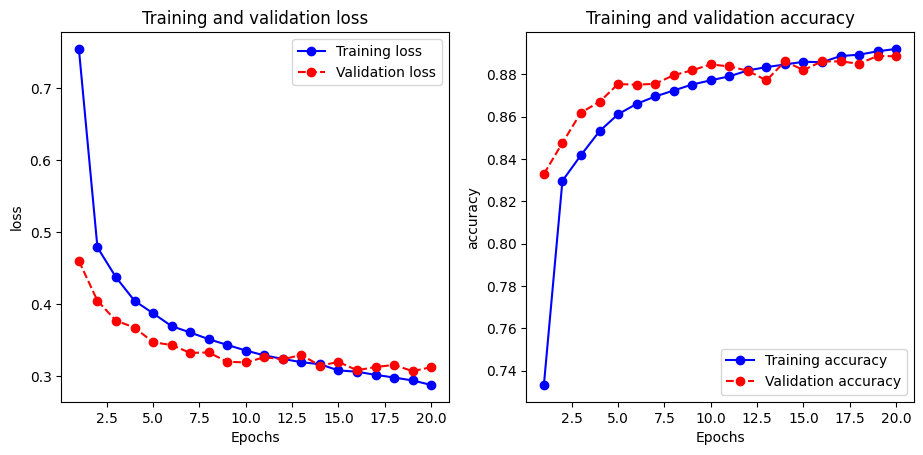

In [42]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)


model = keras.Sequential(name='model')
'Input Layer'
model.add(layers.Input(shape=(28*28, )))

'Layer 1'
model.add(layers.Dense(100, activation = 'relu')) 
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3)) 
'Layer 2'
model.add(layers.Dense(100, activation = 'relu')) 
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

'Output Layer'
model.add(layers.Dense(10, name = 'output', activation = 'softmax'))
model.summary()

# Training setup
opt = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = loss_function[0], metrics = metrics[0])
history = model.fit(train_images,
                        train_labels,
                        epochs = 20,
                        batch_size = 200,
                        validation_data = (val_images, val_labels),
                        callbacks=[early_stop], # Adding "Red List Toping"
                        verbose=1) # Verbose 1 to see training progress
model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print_report(model)
multiplot(history)

c:\Users\pedro\anaconda3\envs\QML\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Final Model with Early Stopping...
Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7943 - loss: 0.5835 - val_accuracy: 0.8539 - val_loss: 0.4074
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8485 - loss: 0.4224 - val_accuracy: 0.8652 - val_loss: 0.3779
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8633 - loss: 0.3789 - val_accuracy: 0.8764 - val_loss: 0.3436
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8697 - loss: 0.3575 - val_accuracy: 0.8735 - val_loss: 0.3422
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8786 - loss: 0.3374 - val_accuracy: 0.8617 - val_loss: 0.3737
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8835 - loss: 0.3193 - val_accuracy: 0.8763 - val_loss: 0.3313
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8848 - loss: 0.3091 - val_accuracy: 0.8627 - val_loss: 0.3618
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step

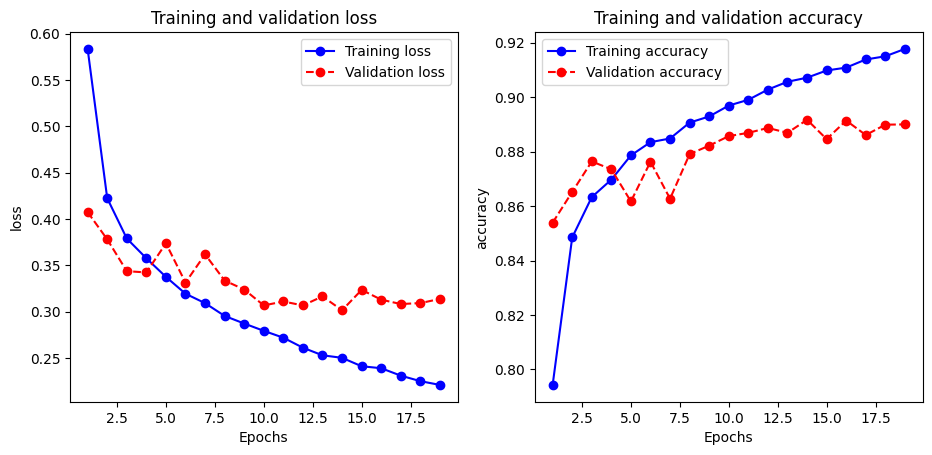

In [38]:
# --- CELL: Final Combined Model (Modelo 'Zen' / 'Seten') ---
# Combining Dropout + Batch Norm + Early Stopping [cite: 95]

from keras.callbacks import EarlyStopping

# Define Early Stopping ("Red List Toping")
# Monitor val_loss, stop if no improvement for 5 epochs, restore best weights
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

def build_final_model():
    model = keras.Sequential(name='model')
    
    # Layer 1
    model.add(layers.Dense(256, input_shape=(28 * 28,)))
    model.add(layers.BatchNormalization()) # Normalize
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))         # Regularize
    
    # Layer 2
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))
    
    # Output
    model.add(layers.Dense(10, activation='softmax'))
    return model

model_final = build_final_model()
model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training Final Model with Early Stopping...")
history_final = model_final.fit(train_images,
                                train_labels,
                                epochs=50, # Set high, Early Stopping will kill it when ready
                                batch_size=128,
                                validation_data=(val_images, val_labels),
                                callbacks=[early_stop], # Adding "Red List Toping"
                                verbose=1)

multiplot(history_final)